In [18]:
from math import sqrt
import math
import random

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

########## Library #############
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)
########## Library #############

Упражнение 17.1

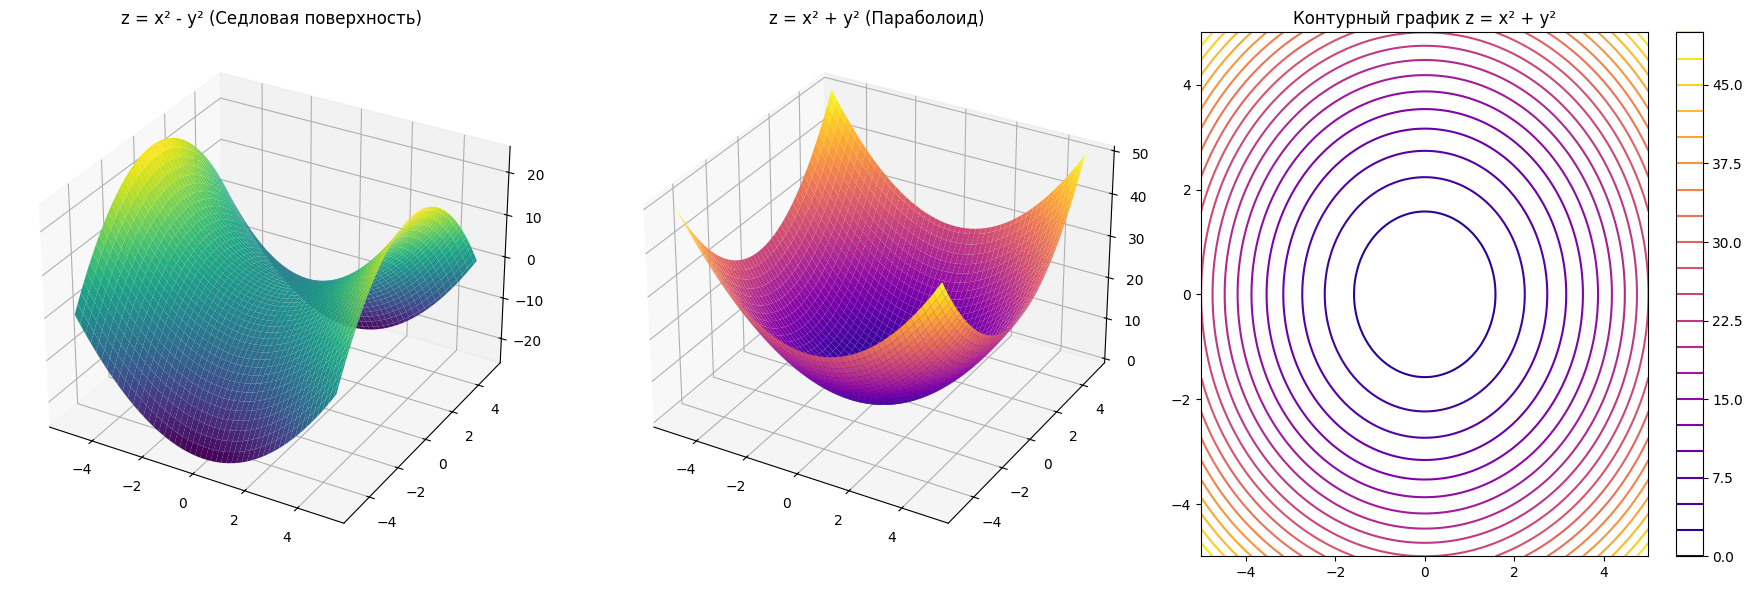

In [19]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z1 = X**2 - Y**2  # Гиперболический параболоид
Z2 = X**2 + Y**2   # Эллиптический параболоид

fig = plt.figure(figsize=(18, 6))

# 3D    
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('z = x² - y² (Седловая поверхность)')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='plasma')
ax2.set_title('z = x² + y² (Параболоид)')

ax3 = fig.add_subplot(133)
contour = ax3.contour(X, Y, Z2, levels=20, cmap='plasma')
ax3.set_title('Контурный график z = x² + y²')
plt.colorbar(contour)

plt.tight_layout()
plt.show()

Упражнение 17.1 

Матрица коэффициентов:
 [[ 8 -3 -7]
 [-1  1  2]
 [ 3  1 -7]]

Вектор свободных членов:
 [ 4 -5 -3]

Решение системы:
 [-2.463 -4.829 -1.317]

Норма невязки: 1.2560739669470201e-15


Упражнение 17.2

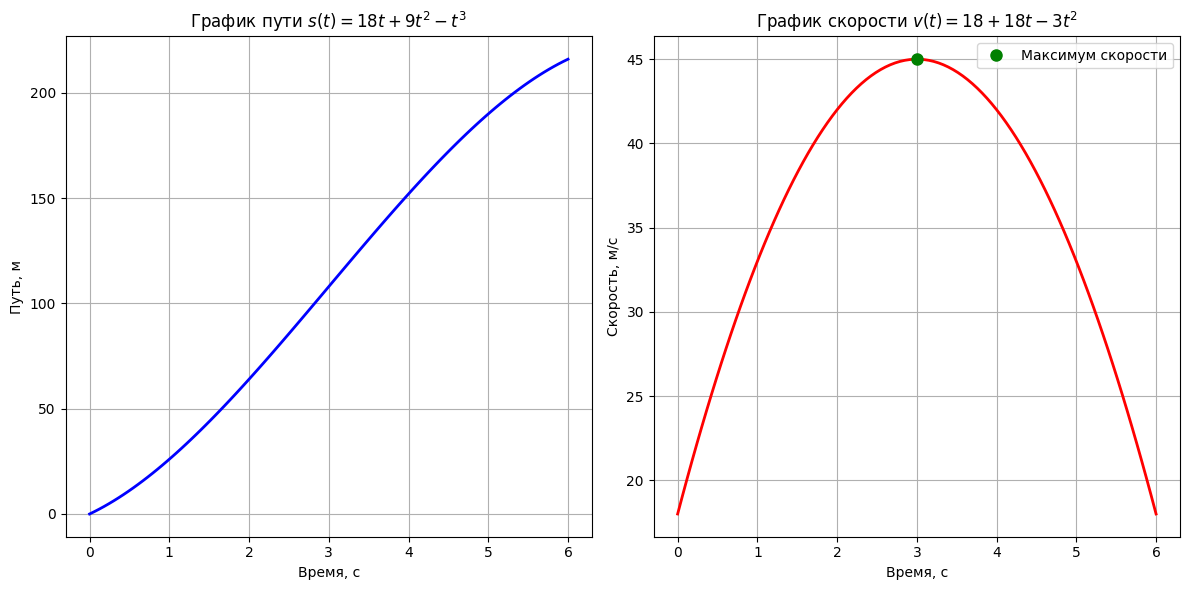

In [21]:
t = np.linspace(0, 6, 100)

s = 18*t + 9*t**2 - t**3

v = 18 + 18*t - 3*t**2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, s, 'b-', linewidth=2)
plt.title('График пути $s(t) = 18t + 9t^2 - t^3$')
plt.xlabel('Время, с')
plt.ylabel('Путь, м')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v, 'r-', linewidth=2)
plt.plot(3, 45, 'go', markersize=8, label='Максимум скорости')
plt.title('График скорости $v(t) = 18 + 18t - 3t^2$')
plt.xlabel('Время, с')
plt.ylabel('Скорость, м/с')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Общие расходы за плавание:
```
R = (a + k·v) · t
```
где `t` - время плавания в сутках.

Связь времени и скорости при расстоянии `l`:
```
t = l / v
```

**Итоговая функция расходов**:
```
R(v) = (a + k·v) · (l / v) = (a·l)/v + k·l * v^2
```

```
dR/dv = - (a·l)/v² + k
```

Приравниваем производную к нулю:
```
- (a·l)/v² + k = 0 → v² = (a·l)/k -> v = √(a·l/k)
```

Проверка на минимум (вторая производная):
```
d²R/dv² = (2·a·l)/v³
```
При `v > 0` и `a, l, k > 0`:
```
d²R/dv² > 0 → минимум
```


**Оптимальная скорость**:
```
v = √(a·l/k)
```

**Минимальные расходы**:
```
R_min = 2·√(a·k·l) + k·l
```


Упражнение 17.3 (Корабли уходят на закат)

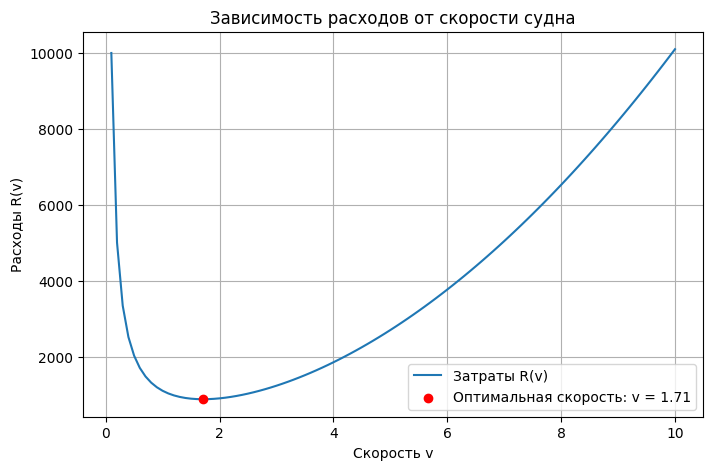

In [22]:
a = 10
k = 1
l = 100 

def cost_function(v, a, k, l):
    return (l * a) / v + k * l * v**2

v_values = np.linspace(0.1, 10, 100)
cost_values = cost_function(v_values, a, k, l)

v_opt = (a / (2 * k)) ** (1/3)
min_cost = cost_function(v_opt, a, k, l)

plt.figure(figsize=(8, 5))
plt.plot(v_values, cost_values, label='Затраты R(v)')
plt.scatter(v_opt, min_cost, color='red', zorder=5, label=f'Оптимальная скорость: v = {v_opt:.2f}')
plt.xlabel('Скорость v')
plt.ylabel('Расходы R(v)')
plt.title('Зависимость расходов от скорости судна')
plt.legend()
plt.grid(True)
plt.show()

```markdown

```
V(x) = (a - 2x)² · x
```

```
V'(x) = d/dx [(60 - 2x)² · x] 
       = 12x² - 240x + 3600
```

2.2. Критические точки:
V'(x) = 0:
```
12x² - 240x + 3600 = 0
x² - 20x + 300 = 0

Корни:
x₁ = 10 см
x₂ = 30 см (не подходит, так как a/2 = 30 см - предельное значение)
```

```
V''(x) = 24x - 240

При x = 10 см:
V''(10) = 24·10 - 240 = -240 < 0 ⇒ максимум
```

Оптимальный размер вырезаемых квадратов: x = 10 см
Максимальный объем коробки 
  ```
  V_max = (60 - 2·10)² · 10 = 40² · 10 = 16,000 см³
  ```

Упражнение 17.4 (Да, это жёстко)

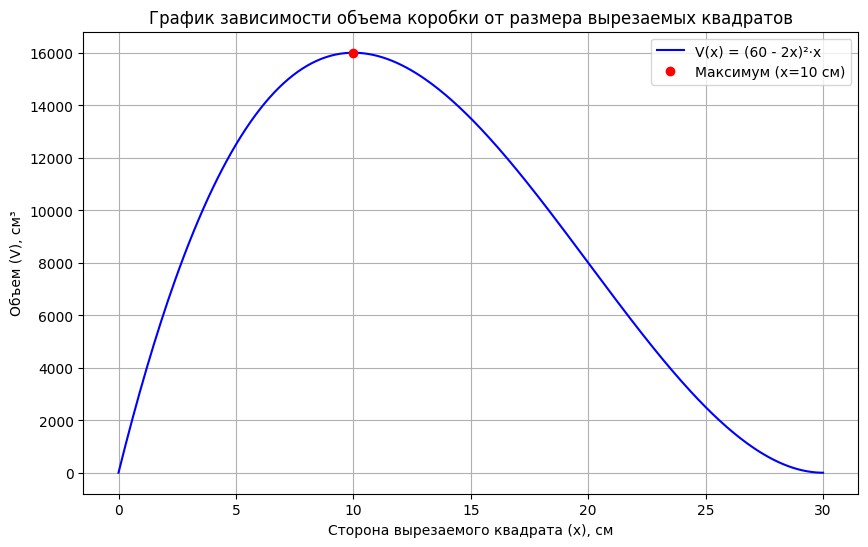

In [23]:
a = 60
x = np.linspace(0, 30, 300)

V = (a - 2*x)**2 * x

plt.figure(figsize=(10, 6))
plt.plot(x, V, 'b-', label='V(x) = (60 - 2x)²·x')
plt.plot(10, (60 - 2*10)**2 * 10, 'ro', label='Максимум (x=10 см)')
plt.title('График зависимости объема коробки от размера вырезаемых квадратов')
plt.xlabel('Сторона вырезаемого квадрата (x), см')
plt.ylabel('Объем (V), см³')
plt.grid(True)
plt.legend()
plt.show()